In [1]:
# no hyperparameter tuning because less computation power

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./datasets/preprocessed.csv')

In [4]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,22,8.694688,13.589273,0.6,2.263869,57.554920,0,8.870193,0,1,...,318.255596,1.375390,8.0,0.0,10.549671,13.043088,0,0,12,1
1,22,5.301024,14.668806,0.0,2.406140,69.201128,1,8.870193,4,2,...,319.018654,1.375395,7.0,1.0,10.705502,14.278149,0,0,12,2
2,22,8.423478,14.960437,0.0,2.496163,59.559201,2,9.074396,0,2,...,318.229277,1.375401,8.0,2.0,12.642979,13.737467,0,0,12,3
3,22,6.355600,16.068119,0.0,2.589230,77.023050,3,6.419909,12,14,...,320.859017,1.375428,0.0,5.0,11.170317,15.347521,0,0,12,4
4,22,10.860881,18.099591,1.0,2.819463,88.580965,0,8.553172,8,11,...,319.071265,1.375382,7.0,8.0,11.015816,16.877070,0,0,12,5


In [5]:
df.isnull().mean()*100

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
Month            0.0
Day              0.0
dtype: float64

In [6]:
y = df['RainTomorrow']
X = df.drop(['RainTomorrow'],axis=1)

In [7]:
X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Month', 'Day'],
      dtype='object')

In [8]:
y

0         0
1         0
2         0
3         0
4         0
         ..
141621    0
141622    0
141623    0
141624    0
141625    0
Name: RainTomorrow, Length: 141626, dtype: int64

In [9]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

os=RandomOverSampler(0.9)
X_ns,y_ns=os.fit_sample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))

X = X_ns
y = y_ns

C:\Users\Acer\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 110382, 1: 31244})
The number of classes after fit Counter({0: 110382, 1: 99343})


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
gb = GradientBoostingClassifier()

In [13]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [14]:
y_pred = gb.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27343  5767]
 [ 7418 22390]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81     33110
           1       0.80      0.75      0.77     29808

    accuracy                           0.79     62918
   macro avg       0.79      0.79      0.79     62918
weighted avg       0.79      0.79      0.79     62918



In [18]:
# accuracy is low because of this is just a simple training .no hyperpparmeter training 
# but it is reccomand for you to do hyperparameter tuning if you have a enough cmputation power

0.7884818237910588

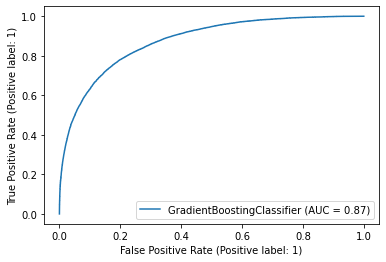

In [20]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
metrics.plot_roc_curve(gb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None)

In [21]:
err  =(y_pred- y_test)

<AxesSubplot:>

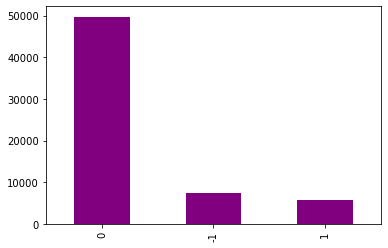

In [22]:
err.value_counts().plot(kind='bar',color='purple')

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.20955847293302393
MSE: 0.20955847293302393
RMSE: 0.4577755704851712


In [ ]:
import pickle
#open a file, where you ant to store the data
file = open('model.pkl', 'wb')
# dump information to that file
pickle.dump(gb, file)
file.close()